<a href="https://colab.research.google.com/github/alpacaJin/pairs-trading-strategies-on-competitors/blob/main/Pairs_Trading_Strategies_on_Competitors_Bitcoin_%26_Monero_to_Crowdstrike_%26_Palo_Alto_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pairs Trading Strategies on Competitors Bitcoin & Monero to CrowdStrike & Palo Alto Networks

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

!pip install scipy
!pip install statsmodels
from statsmodels.tsa.stattools import coint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Competitors Bitcoin & Monero

In [ ]:
# Import BTC File
uploaded = files.upload()
import io

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
# Display First 5 Rows
btc_data = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,9332.340820,17130541557
1,2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,9303.629883,15324301169
2,2020-06-22,9300.915039,9655.073242,9296.872070,9648.717773,9648.717773,21104009514
3,2020-06-23,9644.076172,9670.541016,9547.247070,9629.658203,9629.658203,17006433272
4,2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,18961716076


In [ ]:
# Data Preprocessing -- Check Missing Data
btc_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Date & Adj Close Columns
features = ['Date', 'Adj Close']

# Convert to Dataframe
btc_df = pd.DataFrame(btc_data, columns = features)

# Fix Datetime data
btc_df['Date'] = pd.to_datetime(btc_df['Date'], infer_datetime_format = True)

# Set 'Date' as Index Column
btc_df = btc_df.set_index('Date')

# Display first 5 rows
btc_df

,Adj Close
Date,
2020-06-20,9332.340820
2020-06-21,9303.629883
2020-06-22,9648.717773
2020-06-23,9629.658203
2020-06-24,9313.610352
...,...
2022-06-16,20381.650391
2022-06-17,20471.482422
2022-06-18,19017.642578


In [ ]:
# Import XMR File
uploaded = files.upload()
import io

Saving XMR-USD.csv to XMR-USD.csv


In [ ]:
# Display First 5 Rows
xmr_data = pd.read_csv(io.BytesIO(uploaded['XMR-USD.csv']))
xmr_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-20,63.934765,64.762123,63.381882,63.940842,63.940842,64316630
1,2020-06-21,63.935013,65.138824,63.790520,64.548912,64.548912,60392361
2,2020-06-22,64.581818,66.314034,64.334389,65.929176,65.929176,82556416
3,2020-06-23,65.943993,67.273705,65.212120,66.947510,66.947510,85517277
4,2020-06-24,66.981041,67.479546,64.314323,64.867310,64.867310,72674399


In [ ]:
# Data Preprocessing -- Check Missing Data
xmr_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Date & Adj Close Columns
features = ['Date', 'Adj Close']

# Convert to Dataframe
xmr_df = pd.DataFrame(xmr_data, columns = features)

# Fix Datetime data
xmr_df['Date'] = pd.to_datetime(xmr_df['Date'], infer_datetime_format = True)

# Set 'Date' as Index Column
xmr_df = xmr_df.set_index('Date')

# Display first 5 rows
xmr_df

,Adj Close
Date,
2020-06-20,63.940842
2020-06-21,64.548912
2020-06-22,65.929176
2020-06-23,66.947510
2020-06-24,64.867310
...,...
2022-06-16,106.440773
2022-06-17,114.311501
2022-06-18,104.183105


In [ ]:
# Make a Copy of Data
btc_df2 = btc_df.copy()
xmr_df2 = xmr_df.copy()

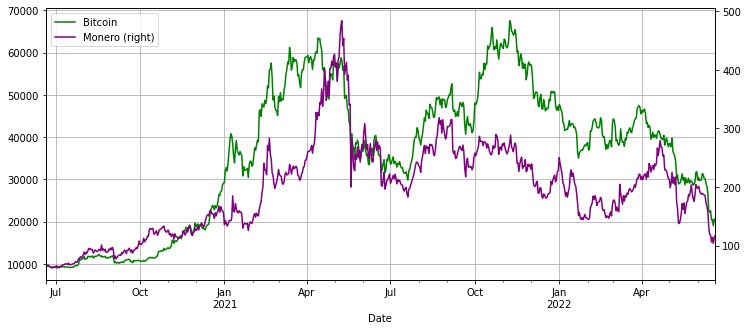

In [ ]:
# Plot Paired Stocks -- June 2020 - June 2022
plt.figure(figsize = (12, 5))
ax1 = btc_df['Adj Close'].plot(color = 'green', grid = True, label = 'Bitcoin')
ax2 = xmr_df['Adj Close'].plot(color = 'purple', grid = True, secondary_y = True, label = 'Monero')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc = 2)
plt.show()

In [ ]:
# Normalize & Accumulate Data
def norm_accu(data):
    return data.pct_change().cumsum()

btc_df['Adj Close'] = norm_accu(btc_df['Adj Close'])
xmr_df['Adj Close'] = norm_accu(xmr_df['Adj Close'])

# Remove First Row w/ NaN
btc_df = btc_df.tail(len(btc_df) - 1)
xmr_df = xmr_df.tail(len(xmr_df) - 1)

# Display First 5 rows
btc_df.head()

,Adj Close
Date,
2020-06-21,-0.003076
2020-06-22,0.034015
2020-06-23,0.032040
2020-06-24,-0.000780
2020-06-25,-0.006020


In [ ]:
# Display First 5 rows
xmr_df.head()

,Adj Close
Date,
2020-06-21,0.009510
2020-06-22,0.030893
2020-06-23,0.046339
2020-06-24,0.015267
2020-06-25,0.007779


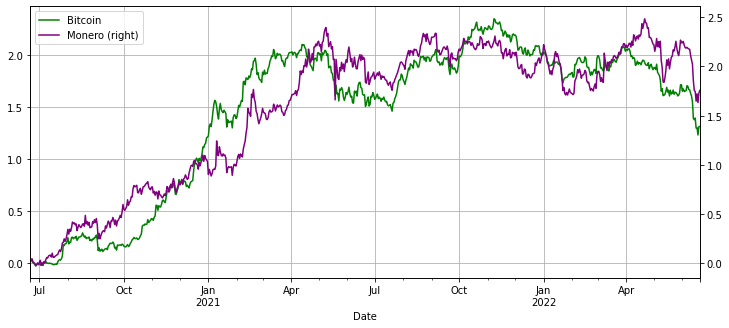

In [ ]:
# Plot Paired Stocks Post-Normalization -- June 2020 - June 2022
plt.figure(figsize = (12, 5))
ax1 = btc_df['Adj Close'].plot(color = 'green', grid = True, label = 'Bitcoin')
ax2 = xmr_df['Adj Close'].plot(color = 'purple', grid = True, secondary_y = True, label = 'Monero')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc = 2)
plt.show()

In [ ]:
# Correlation -- Find Mean & Standard Deviation
def corr(stock1, stock2):
    mean1 = stock1.mean()
    mean2 = stock2.mean()
    std1 = stock1.std()
    std2 = stock2.std()
    corr = ((stock1 * stock2).mean() - mean1 * mean2) / (std1 * std2)
    return corr

# Cointegration imported from library

In [ ]:
# Find Correlation & Cointegration for Competitors
btc_adj_close = "Adj Close"
xmr_adj_close = "Adj Close"

score, pvalue, _ = coint(btc_df[btc_adj_close], xmr_df[xmr_adj_close])
stocks_corr = corr(btc_df[btc_adj_close], xmr_df[xmr_adj_close])

# Display
print("Correlation between Bitcoin & Monero is %f" % (stocks_corr))
print("Cointegration between Bitcoin & Monero is %f" % (pvalue))

Correlation between Bitcoin & Monero is 0.934521
Cointegration between Bitcoin & Monero is 0.662227


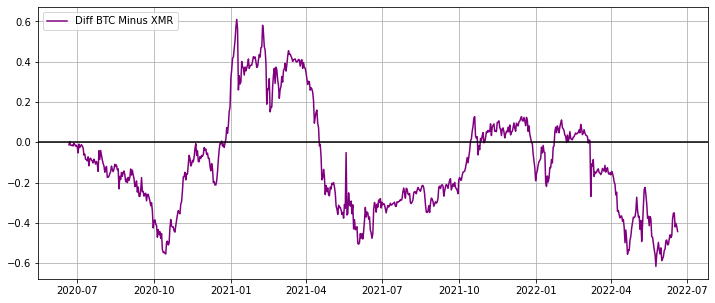

In [ ]:
# Measuring Separation
fix, ax = plt.subplots(figsize = (12, 5))
plt.plot(btc_df['Adj Close'] - xmr_df['Adj Close'], color = 'purple', label = 'Diff BTC Minus XMR')
ax.grid(True)
ax.axhline(y = 0, color = 'black', linestyle = '-')
plt.legend(loc = 2)
plt.show()

In [ ]:
# Designing Spike Thresholds
def norm(data):
    return data.pct_change()

btc_df2['Adj Close'] = norm(btc_df2['Adj Close'])
xmr_df2['Adj Close'] = norm(xmr_df2['Adj Close'])

# Remove First Row w/ NaN
btc_df2 = btc_df2.tail(len(btc_df2) - 1)
xmr_df2 = xmr_df2.tail(len(xmr_df2) - 1)

# Display First 5 rows
btc_df2.head()

,Adj Close
Date,
2020-06-21,-0.003076
2020-06-22,0.037092
2020-06-23,-0.001975
2020-06-24,-0.032820
2020-06-25,-0.005239


In [ ]:
# Display First 5 rows
xmr_df2.head()

,Adj Close
Date,
2020-06-21,0.009510
2020-06-22,0.021383
2020-06-23,0.015446
2020-06-24,-0.031072
2020-06-25,-0.007488


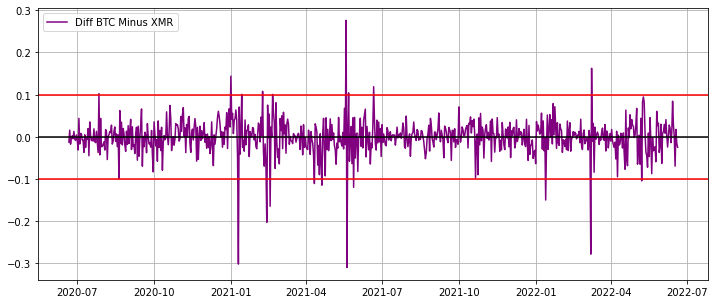

In [ ]:
# Plot Competitors' Spike Thresholds
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(btc_df2['Adj Close'] - xmr_df2['Adj Close'], color = 'purple', label = 'Diff BTC Minus XMR')
ax.grid(True)
ax.axhline(y = 0, color = 'black', linestyle = '-')
ax.axhline(y = 0.1, color = 'red', linestyle = '-')
ax.axhline(y = -0.1, color = 'red', linestyle = '-')
plt.legend(loc = 2)
plt.show()

Competitors CrowdStrike & Palo Alto Networks

In [ ]:
# Import CRWD File
uploaded = files.upload()
import io

Saving CRWD.csv to CRWD.csv


In [ ]:
# Display First 5 Rows
crwd_data = pd.read_csv(io.BytesIO(uploaded['CRWD.csv']))
crwd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-22,101.339996,105.559998,100.260002,105.019997,105.019997,8418200
1,2020-06-23,105.800003,107.300003,103.150002,104.269997,104.269997,8600900
2,2020-06-24,103.830002,106.095001,100.500000,103.699997,103.699997,4958100
3,2020-06-25,103.800003,108.335999,103.639999,105.709999,105.709999,6112400
4,2020-06-26,104.000000,104.000000,97.519997,98.790001,98.790001,17438500


In [ ]:
# Data Preprocessing -- Check Missing Data 
crwd_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Date & Adj Close Columns
features = ['Date', 'Adj Close']

# Convert to Dataframe
crwd_df = pd.DataFrame(crwd_data, columns = features)

# Fix Datetime data
crwd_df['Date'] = pd.to_datetime(crwd_df['Date'], infer_datetime_format = True)

# Set 'Date' as Index Column
crwd_df = crwd_df.set_index('Date')

# Display first 5 rows
crwd_df

,Adj Close
Date,
2020-06-22,105.019997
2020-06-23,104.269997
2020-06-24,103.699997
2020-06-25,105.709999
2020-06-26,98.790001
...,...
2022-06-13,154.520004
2022-06-14,159.259995
2022-06-15,164.350006


In [ ]:
# Import PANW File
uploaded = files.upload()
import io

Saving PANW.csv to PANW.csv


In [ ]:
# Display First 5 Rows
panw_data = pd.read_csv(io.BytesIO(uploaded['PANW.csv']))
panw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-22,230.860001,234.509995,230.179993,232.880005,232.880005,1360200
1,2020-06-23,232.070007,232.850006,228.419998,229.309998,229.309998,1387900
2,2020-06-24,229.000000,231.110001,221.330002,223.399994,223.399994,1284000
3,2020-06-25,223.000000,227.100006,221.199997,226.899994,226.899994,973700
4,2020-06-26,226.440002,226.880005,223.039993,225.389999,225.389999,2181700


In [ ]:
# Data Preprocessing -- Check Missing Data 
panw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Date & Adj Close Columns
features = ['Date', 'Adj Close']

# Convert to Dataframe
panw_df = pd.DataFrame(panw_data, columns = features)

# Fix Datetime data
panw_df['Date'] = pd.to_datetime(panw_df['Date'], infer_datetime_format = True)

# Set 'Date' as Index Column
panw_df = panw_df.set_index('Date')

# Display first 5 rows
panw_df

,Adj Close
Date,
2020-06-22,232.880005
2020-06-23,229.309998
2020-06-24,223.399994
2020-06-25,226.899994
2020-06-26,225.389999
...,...
2022-06-13,477.730011
2022-06-14,481.630005
2022-06-15,487.019989


In [ ]:
# Make a Copy of Data
crwd_df2 = crwd_df.copy()
panw_df2 = panw_df.copy()

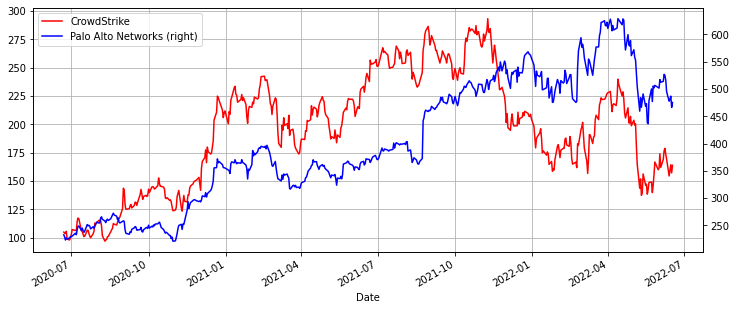

In [ ]:
# Plot Paired Stocks -- June 2020 - June 2022
plt.figure(figsize = (12, 5))
ax1 = crwd_df['Adj Close'].plot(color = 'red', grid = True, label = 'CrowdStrike')
ax2 = panw_df['Adj Close'].plot(color = 'blue', grid = True, secondary_y = True, label = 'Palo Alto Networks')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc = 2)
plt.show()

In [ ]:
# Normalize & Accumulate Data
crwd_df['Adj Close'] = norm_accu(crwd_df['Adj Close'])
panw_df['Adj Close'] = norm_accu(panw_df['Adj Close'])

# Remove First Row w/ NaN
crwd_df = crwd_df.tail(len(crwd_df) - 1)
panw_df = panw_df.tail(len(panw_df) - 1)

# Display First 5 rows
crwd_df.head()

,Adj Close
Date,
2020-06-23,-0.007141
2020-06-24,-0.012608
2020-06-25,0.006775
2020-06-26,-0.058687
2020-06-29,-0.065672


In [ ]:
# Display First 5 rows
panw_df.head()

,Adj Close
Date,
2020-06-23,-0.015330
2020-06-24,-0.041103
2020-06-25,-0.025436
2020-06-26,-0.032091
2020-06-29,-0.024548


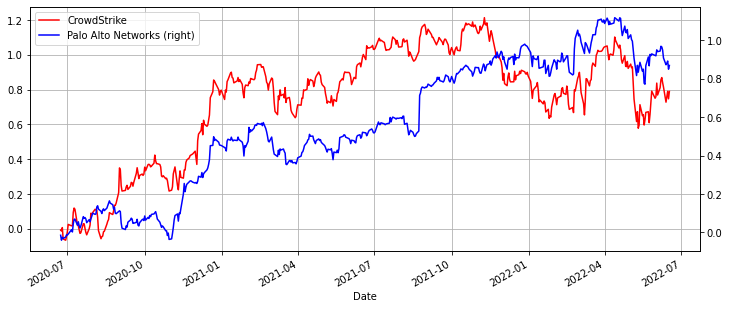

In [ ]:
# Plot Paired Stocks Post-Normalization -- June 2020 - June 2022
plt.figure(figsize = (12, 5))
ax1 = crwd_df['Adj Close'].plot(color = 'red', grid = True, label = 'CrowdStrike')
ax2 = panw_df['Adj Close'].plot(color = 'blue', grid = True, secondary_y = True, label = 'Palo Alto Networks')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc = 2)
plt.show()

In [ ]:
# Find Correlation & Cointegration for Competitors
crwd_adj_close = "Adj Close"
panw_adj_close = "Adj Close"

score, pvalue, _ = coint(crwd_df[crwd_adj_close], panw_df[panw_adj_close])
stocks_corr = corr(crwd_df[crwd_adj_close], panw_df[panw_adj_close])

# Display
print("Correlation between CrowdStrike & Palo Alto Networks is %f" % (stocks_corr))
print("Cointegration between CrowdStrike & Palo Alto Networks is %f" % (pvalue))

Correlation between CrowdStrike & Palo Alto Networks is 0.771216
Cointegration between CrowdStrike & Palo Alto Networks is 0.686522


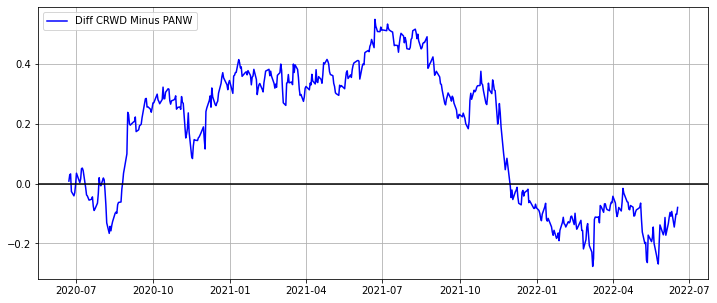

In [ ]:
# Measuring Separation
fix, ax = plt.subplots(figsize = (12, 5))
plt.plot(crwd_df['Adj Close'] - panw_df['Adj Close'], color = 'blue', label = 'Diff CRWD Minus PANW')
ax.grid(True)
ax.axhline(y = 0, color = 'black', linestyle = '-')
plt.legend(loc = 2)
plt.show()

In [ ]:
# Designing Spike Thresholds
crwd_df2['Adj Close'] = norm(crwd_df2['Adj Close'])
panw_df2['Adj Close'] = norm(panw_df2['Adj Close'])

# Remove First Row w/ NaN
crwd_df2 = crwd_df2.tail(len(crwd_df2) - 1)
panw_df2 = panw_df2.tail(len(panw_df2) - 1)

# Display first 5 rows
crwd_df2.head()

,Adj Close
Date,
2020-06-23,-0.007141
2020-06-24,-0.005467
2020-06-25,0.019383
2020-06-26,-0.065462
2020-06-29,-0.006985


In [ ]:
# Display first 5 rows
panw_df2.head()

,Adj Close
Date,
2020-06-23,-0.015330
2020-06-24,-0.025773
2020-06-25,0.015667
2020-06-26,-0.006655
2020-06-29,0.007542


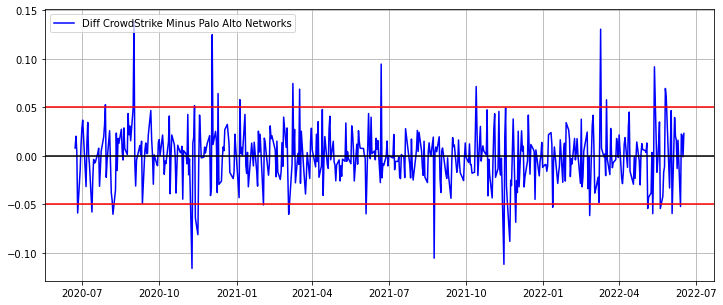

In [ ]:
# Plot Competitors' Spike Thresholds
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(crwd_df2['Adj Close'] - panw_df2['Adj Close'], color = 'blue', label = 'Diff CrowdStrike Minus Palo Alto Networks')
ax.grid(True)
ax.axhline(y = 0, color = 'black', linestyle = '-')
ax.axhline(y = 0.05, color = 'red', linestyle = '-')
ax.axhline(y = -0.05, color = 'red', linestyle = '-')
plt.legend(loc = 2)
plt.show()